In [1]:
#import  relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

### Data

In [2]:
#tfds.load(string name, boolean as_supervised): carrega um banco de dados do tfds,  as_supervised = True faz com que
# os dados sejam importados como uma estrutura de 2 tuplas [input,target]
mnist_dataset,mnist_info = tfds.load(name = 'mnist',with_info = True, as_supervised=True,)


In [3]:
mnist_train, mnist_test = mnist_dataset['train'],mnist_dataset['test']

num_validation_samples = 0.1*mnist_info.splits['train'].num_examples

#tf.cast(object, data type): transforma um objeto em outro tipo de variável
num_validation_samples = tf.cast(num_validation_samples,tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples,tf.int64)

'''
função que tende a normalizar os valores da escala de cinza da imagem, transformando os 8bits (0 a 255) em valores de 0 a 1
'''
def scale(image,label):
    image = tf.cast(image,tf.float32)
    image /= 255.0
    return image, label

#dataset.map(função): aplica uma transformação em um devido dataset, utiliza como parametro a função que determina 
scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

#há a necessidade de embaralhar o banco de dados, uma vez que ele pode estar ordenado e isso confundiria a rede neural
#além dsisso, o computador não aguentaria embaralhar todo o dataset de uma vez, então é necessário faze-lo em pedaços
# que serão definidos pelo buffer_size
BUFFER_SIZE = 10000
shuffled_trained_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

#separando os dados de validação dos dados de treinamento
#dataset.take(int n) retira de um montante, os primeiros n-objetos
validation_data = shuffled_trained_and_validation_data.take(num_validation_samples)
#dataset.skip(int n): ignora os primeiros n-objetos de um montante
train_data = shuffled_trained_and_validation_data.skip(num_validation_samples)

# BATCHING preparation 

In [4]:
BATCH_SIZE = 50
#dataset.batch(int batch_size): método que combina elementos consecutivos de um dataset em batches
train_data = train_data.batch(BATCH_SIZE)

'''
os dados de validação como serão usados apenas na fase de feed foward, não há necessidade que estejam separados em batches
no entanto, o modelo espera que os dados de validação também estejam em formato de batch
criação de um único batch com as validaçoes
'''
validation_data = validation_data.batch(num_validation_samples)
test_data= test_data.batch(num_test_samples)

'''os dados de validação precisam ser iguais aos dados mnist, que é um iterador em 2-tuple format, 
portanto é necessário extrair os dados de validação de forma correta'''
#iter(arg): função que torna o argumento um iterável
# next(): loads the next element of an iterable object
validation_inputs, validation_targets = next(iter(validation_data))

## Model

In [5]:
input_size = 784
output_size = 10
hidden_layer_size = 100 #50

#tf.keras.layers.Flatten(original shape): transforms a tensor into a vector
model= tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax'),
])

### Choose the optimizer and the loss function

In [6]:
#sparse_categorical_crossentropy é devido ao fato de que as saídas devem ser one-hot-encoding
#caso contrario, seria categorical_crossentropy ou mesmo binary_crossentropy para casos boolean-encoding
model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

### Training

In [7]:
NUM_EPOCHS = 10

model.fit(train_data, epochs = NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2,validation_steps=10)

Epoch 1/10
1080/1080 - 4s - loss: 0.2801 - accuracy: 0.9195 - val_loss: 0.1392 - val_accuracy: 0.9617
Epoch 2/10
1080/1080 - 3s - loss: 0.1168 - accuracy: 0.9651 - val_loss: 0.0954 - val_accuracy: 0.9732
Epoch 3/10
1080/1080 - 3s - loss: 0.0839 - accuracy: 0.9743 - val_loss: 0.0699 - val_accuracy: 0.9773
Epoch 4/10
1080/1080 - 3s - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.0651 - val_accuracy: 0.9792
Epoch 5/10
1080/1080 - 3s - loss: 0.0509 - accuracy: 0.9839 - val_loss: 0.0512 - val_accuracy: 0.9837
Epoch 6/10
1080/1080 - 3s - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0421 - val_accuracy: 0.9848
Epoch 7/10
1080/1080 - 3s - loss: 0.0345 - accuracy: 0.9886 - val_loss: 0.0293 - val_accuracy: 0.9918
Epoch 8/10
1080/1080 - 3s - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 9/10
1080/1080 - 3s - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0249 - val_accuracy: 0.9917
Epoch 10/10
1080/1080 - 3s - loss: 0.0236 - accuracy: 0.9920 - val_loss: 0.0263 - 

# Testing the model

In [8]:
#model.evaluate(test_data): retorna o valor do custo/loss e a acurácia do modelo para os dados de teste
test_loss, test_accuracy = model.evaluate(test_data)

      1/Unknown - 1s 519ms/step - loss: 0.0878 - accuracy: 0.978 - 1s 547ms/step - loss: 0.0878 - accuracy: 0.9780

In [9]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss,test_accuracy*100))

Test loss: 0.09. Test accuracy: 97.80%


valor que será mandado para ela: 4
O valor que eu recebi foi um: 4


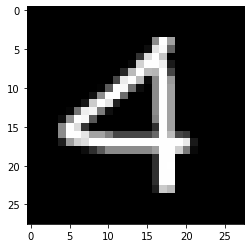

In [10]:
#separação do dataset de teste, para imagens e para labels correspondentes
test_images, test_targets = next(iter(test_data))
ind = 1000
print("valor que será mandado para ela: %d" % test_targets[ind])
plt.imshow(test_images[ind].numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))

y = model.predict(test_data)
print("O valor que eu recebi foi um: %d" % np.argmax(y[ind]))
